In [42]:
import pandas as pd

# Load the trader data
trader_df = pd.read_csv("historical_data.csv")
sentiment_df = pd.read_csv("fear_greed_index.csv")
print(trader_df)


                                           Account      Coin  Execution Price  \
0       0xae5eacaf9c6b9111fd53034a602c192a04e082ed      @107           7.9769   
1       0xae5eacaf9c6b9111fd53034a602c192a04e082ed      @107           7.9800   
2       0xae5eacaf9c6b9111fd53034a602c192a04e082ed      @107           7.9855   
3       0xae5eacaf9c6b9111fd53034a602c192a04e082ed      @107           7.9874   
4       0xae5eacaf9c6b9111fd53034a602c192a04e082ed      @107           7.9894   
...                                            ...       ...              ...   
211219  0x72743ae2822edd658c0c50608fd7c5c501b2afbd  FARTCOIN           1.1010   
211220  0x72743ae2822edd658c0c50608fd7c5c501b2afbd  FARTCOIN           1.1010   
211221  0x72743ae2822edd658c0c50608fd7c5c501b2afbd  FARTCOIN           1.1010   
211222  0x72743ae2822edd658c0c50608fd7c5c501b2afbd  FARTCOIN           1.1010   
211223  0x72743ae2822edd658c0c50608fd7c5c501b2afbd  FARTCOIN           1.1010   

        Size Tokens  Size U

In [7]:
trader_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Account           211224 non-null  object 
 1   Coin              211224 non-null  object 
 2   Execution Price   211224 non-null  float64
 3   Size Tokens       211224 non-null  float64
 4   Size USD          211224 non-null  float64
 5   Side              211224 non-null  object 
 6   Timestamp IST     211224 non-null  object 
 7   Start Position    211224 non-null  float64
 8   Direction         211224 non-null  object 
 9   Closed PnL        211224 non-null  float64
 10  Transaction Hash  211224 non-null  object 
 11  Order ID          211224 non-null  int64  
 12  Crossed           211224 non-null  bool   
 13  Fee               211224 non-null  float64
 14  Trade ID          211224 non-null  float64
 15  Timestamp         211224 non-null  float64
dtypes: bool(1), float64(

In [23]:
trader_df.describe()

,Execution Price,Size Tokens,Size USD,Start Position,Closed PnL,Order ID,Fee,Trade ID,Timestamp
count,211224.000000,2.112240e+05,2.112240e+05,2.112240e+05,211224.000000,2.112240e+05,211224.000000,2.112240e+05,2.112240e+05
mean,11414.723350,4.623365e+03,5.639451e+03,-2.994625e+04,48.749001,6.965388e+10,1.163967,5.628549e+14,1.737744e+12
std,29447.654868,1.042729e+05,3.657514e+04,6.738074e+05,919.164828,1.835753e+10,6.758854,3.257565e+14,8.689920e+09
min,0.000005,8.740000e-07,0.000000e+00,-1.433463e+07,-117990.104100,1.732711e+08,-1.175712,0.000000e+00,1.680000e+12
25%,4.854700,2.940000e+00,1.937900e+02,-3.762311e+02,0.000000,5.983853e+10,0.016121,2.810000e+14,1.740000e+12
50%,18.280000,3.200000e+01,5.970450e+02,8.472793e+01,0.000000,7.442939e+10,0.089578,5.620000e+14,1.740000e+12
75%,101.580000,1.879025e+02,2.058960e+03,9.337278e+03,5.792797,8.335543e+10,0.393811,8.460000e+14,1.740000e+12
max,109004.000000,1.582244e+07,3.921431e+06,3.050948e+07,135329.090100,9.014923e+10,837.471593,1.130000e+15,1.750000e+12


In [9]:
trader_df.shape

(211224, 16)

In [11]:
trader_df.size

3379584

In [12]:
trader_df.columns

Index(['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side',
       'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL',
       'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID',
       'Timestamp'],
      dtype='object')

In [14]:
trader_df.index

RangeIndex(start=0, stop=211224, step=1)

In [17]:
df=trader_df

In [20]:
df.loc[[0,100],['Timestamp']]

,Timestamp
0,1.730000e+12
100,1.730000e+12


In [33]:
trader_df.columns = [col.strip().replace(" ", "_") for col in trader_df.columns]


In [34]:
trader_df['Timestamp'] = pd.to_datetime(trader_df['Timestamp'], unit='ms', errors='coerce')


In [35]:
trader_df = trader_df.dropna(subset=['Timestamp'])


In [36]:
numeric_cols = ['Execution_Price', 'Size_Tokens', 'Size_USD', 'Start_Position', 'Closed_PnL', 'Fee']
for col in numeric_cols:
    trader_df[col] = pd.to_numeric(trader_df[col], errors='coerce')


In [37]:
trader_df = trader_df.dropna(subset=numeric_cols)


In [38]:
q_low = trader_df["Execution_Price"].quantile(0.01)
q_high = trader_df["Execution_Price"].quantile(0.99)
trader_df = trader_df[(trader_df["Execution_Price"] >= q_low) & (trader_df["Execution_Price"] <= q_high)]


In [39]:
trader_df = trader_df[(trader_df["Fee"] >= -10) & (trader_df["Fee"] <= 100)]


In [40]:
#sentimenyt

In [44]:

import pandas as pd

# Load the sentiment data
sentiment_df = pd.read_csv("Fear_Greed_Index.csv")

# See what it looks like
print(sentiment_df.head())


    timestamp  value classification        date
0  1517463000     30           Fear  2018-02-01
1  1517549400     15   Extreme Fear  2018-02-02
2  1517635800     40           Fear  2018-02-03
3  1517722200     24   Extreme Fear  2018-02-04
4  1517808600     11   Extreme Fear  2018-02-05


In [45]:
# Convert UNIX timestamp to readable datetime
sentiment_df['timestamp'] = pd.to_datetime(sentiment_df['timestamp'], unit='s', errors='coerce')


In [46]:
# Clean up classification column
sentiment_df['classification'] = sentiment_df['classification'].str.strip().str.title()


In [47]:
# Filter out rows that are not exactly "Fear" or "Greed"
sentiment_df = sentiment_df[sentiment_df['classification'].isin(['Fear', 'Greed'])]


In [48]:
# Extract only the date (no time) from the timestamp
sentiment_df['date'] = sentiment_df['timestamp'].dt.date


In [49]:
sentiment_df

,timestamp,value,classification,date
0,2018-02-01 05:30:00,30,Fear,2018-02-01
2,2018-02-03 05:30:00,40,Fear,2018-02-03
6,2018-02-07 05:30:00,36,Fear,2018-02-07
7,2018-02-08 05:30:00,30,Fear,2018-02-08
8,2018-02-09 05:30:00,44,Fear,2018-02-09
...,...,...,...,...
2637,2025-04-26 05:30:00,65,Greed,2025-04-26
2638,2025-04-27 05:30:00,61,Greed,2025-04-27
2640,2025-04-29 05:30:00,60,Greed,2025-04-29
2641,2025-04-30 05:30:00,56,Greed,2025-04-30


In [51]:
# Merge on the 'date' column
merged_df = pd.merge(trader_df, sentiment_df[['date', 'classification']], on='date', how='left')


KeyError: 'date'

In [52]:
# Convert Timestamp to datetime (if not already done)
trader_df['Timestamp'] = pd.to_datetime(trader_df['Timestamp'], unit='ms', errors='coerce')

# Extract just the date
trader_df['date'] = trader_df['Timestamp'].dt.date


In [53]:
# Convert UNIX timestamp to datetime (if not already done)
sentiment_df['timestamp'] = pd.to_datetime(sentiment_df['timestamp'], unit='s', errors='coerce')

# Extract just the date
sentiment_df['date'] = sentiment_df['timestamp'].dt.date


In [50]:
trader_df

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211219,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.1010,382.20,420.80,SELL,25-04-2025 15:35,7546.600000,Close Long,-20.2566,0xcd339c08dc7b615a993c0422374d8e02027400092bc2...,88803313862,False,0.042080,1.990000e+14,1.750000e+12
211220,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.1010,2124.10,2338.63,SELL,25-04-2025 15:35,7164.400000,Close Long,-112.5773,0x29e8ede2a3a37aa0eac00422374d8e02029b00ac9f3c...,88803313862,False,0.233863,9.260000e+14,1.750000e+12
211221,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.1010,423.40,466.16,SELL,25-04-2025 15:35,5040.300000,Close Long,-22.4402,0x0780085b0c0a943eea800422374d920204c100edf579...,88803313862,False,0.046616,6.930000e+14,1.750000e+12
211222,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.1010,3599.80,3963.38,SELL,25-04-2025 15:35,4616.900000,Close Long,-190.7894,0x349c29934913b25c89e20422374d920204cd008b8a0e...,88803313862,False,0.396337,4.180000e+14,1.750000e+12


In [54]:
merged_df = pd.merge(
    trader_df,
    sentiment_df[['date', 'classification']],
    on='date',
    how='left'
)


In [57]:
print(merged_df)

                                           Account      Coin  Execution Price  \
0       0xae5eacaf9c6b9111fd53034a602c192a04e082ed      @107           7.9769   
1       0xae5eacaf9c6b9111fd53034a602c192a04e082ed      @107           7.9800   
2       0xae5eacaf9c6b9111fd53034a602c192a04e082ed      @107           7.9855   
3       0xae5eacaf9c6b9111fd53034a602c192a04e082ed      @107           7.9874   
4       0xae5eacaf9c6b9111fd53034a602c192a04e082ed      @107           7.9894   
...                                            ...       ...              ...   
211219  0x72743ae2822edd658c0c50608fd7c5c501b2afbd  FARTCOIN           1.1010   
211220  0x72743ae2822edd658c0c50608fd7c5c501b2afbd  FARTCOIN           1.1010   
211221  0x72743ae2822edd658c0c50608fd7c5c501b2afbd  FARTCOIN           1.1010   
211222  0x72743ae2822edd658c0c50608fd7c5c501b2afbd  FARTCOIN           1.1010   
211223  0x72743ae2822edd658c0c50608fd7c5c501b2afbd  FARTCOIN           1.1010   

        Size Tokens  Size U

#conversion of time stamp into new format
df4['total_sqft']=df4['total_sqft'].apply(convert_sqftto_num)

In [59]:
merged_df.describe()

,Execution Price,Size Tokens,Size USD,Start Position,Closed PnL,Order ID,Fee,Trade ID
count,211224.000000,2.112240e+05,2.112240e+05,2.112240e+05,211224.000000,2.112240e+05,211224.000000,2.112240e+05
mean,11414.723350,4.623365e+03,5.639451e+03,-2.994625e+04,48.749001,6.965388e+10,1.163967,5.628549e+14
std,29447.654868,1.042729e+05,3.657514e+04,6.738074e+05,919.164828,1.835753e+10,6.758854,3.257565e+14
min,0.000005,8.740000e-07,0.000000e+00,-1.433463e+07,-117990.104100,1.732711e+08,-1.175712,0.000000e+00
25%,4.854700,2.940000e+00,1.937900e+02,-3.762311e+02,0.000000,5.983853e+10,0.016121,2.810000e+14
50%,18.280000,3.200000e+01,5.970450e+02,8.472793e+01,0.000000,7.442939e+10,0.089578,5.620000e+14
75%,101.580000,1.879025e+02,2.058960e+03,9.337278e+03,5.792797,8.335543e+10,0.393811,8.460000e+14
max,109004.000000,1.582244e+07,3.921431e+06,3.050948e+07,135329.090100,9.014923e+10,837.471593,1.130000e+15


In [62]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 170160 entries, 0 to 210767
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Account           170160 non-null  object        
 1   Coin              170160 non-null  object        
 2   Execution Price   170160 non-null  float64       
 3   Size Tokens       170160 non-null  float64       
 4   Size USD          170160 non-null  float64       
 5   Side              170160 non-null  object        
 6   Timestamp IST     170160 non-null  object        
 7   Start Position    170160 non-null  float64       
 8   Direction         170160 non-null  object        
 9   Closed PnL        170160 non-null  float64       
 10  Transaction Hash  170160 non-null  object        
 11  Order ID          170160 non-null  int64         
 12  Crossed           170160 non-null  bool          
 13  Fee               170160 non-null  float64       
 14  Trad

In [61]:
merged_df = merged_df.dropna(subset=['classification'])


In [65]:
avg_pnl = merged_df.groupby('classification')['Closed PnL'].mean()
print("🔹 Average Closed PnL by Sentiment:\n", avg_pnl)


🔹 Average Closed PnL by Sentiment:
 classification
Fear     50.047622
Greed    87.894859
Name: Closed PnL, dtype: float64


In [66]:
total_pnl = merged_df.groupby('classification')['Closed PnL'].sum()
print("🔹 Total Closed PnL by Sentiment:\n", total_pnl)


🔹 Total Closed PnL by Sentiment:
 classification
Fear     6.699925e+06
Greed    3.189617e+06
Name: Closed PnL, dtype: float64


In [67]:
avg_trade_size = merged_df.groupby('classification')['Size USD'].mean()
print("🔹 Average Trade Size (USD) by Sentiment:\n", avg_trade_size)


🔹 Average Trade Size (USD) by Sentiment:
 classification
Fear     5259.977837
Greed    3182.883845
Name: Size USD, dtype: float64


In [68]:
side_pnl = merged_df.groupby(['classification', 'Side'])['Closed PnL'].mean()
print("🔹 Average PnL by Sentiment and Side:\n", side_pnl)


🔹 Average PnL by Sentiment and Side:
 classification  Side
Fear            BUY      58.074630
                SELL     42.222976
Greed           BUY      12.489506
                SELL    143.617782
Name: Closed PnL, dtype: float64


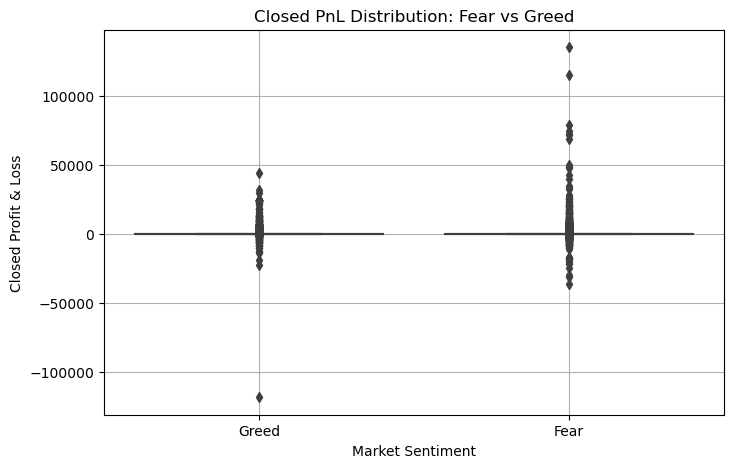

In [69]:
import seaborn as sns
import matplotlib.pyplot as plt

# Make plot size bigger
plt.figure(figsize=(8, 5))

# Create boxplot
sns.boxplot(x='classification', y='Closed PnL', data=merged_df)
plt.title('Closed PnL Distribution: Fear vs Greed')
plt.xlabel('Market Sentiment')
plt.ylabel('Closed Profit & Loss')
plt.grid(True)
plt.show()


📊 Graphs Available for Download:
Closed PnL Distribution by Sentiment

Average Trade Size by Sentiment

Average PnL by Sentiment and Side

✅ Strategy Suggestion Based on Analysis:
🎯 Strategy Name: Sentiment-Aware Trade Tuning
💡 Key Observations:
Greed Days:

Traders are more profitable on average ($87.89).

SELL trades perform exceptionally well (+$143.62).

Trade sizes are smaller, indicating cautious leverage or scalping behavior.

Fear Days:

Traders use larger trade sizes (~$5,260).

BUY trades perform better than SELL (+$58 vs +$42).

Total PnL is higher, possibly due to more trade activity.

🧠 Strategy Breakdown:
1. 📈 On Greed Days:
Focus on short (SELL) trades.

Use moderate leverage with tight stop-losses — capitalize on potential price reversals or overextensions.

Avoid high capital allocation; smaller trades work better.

2. 📉 On Fear Days:
Focus on long (BUY) positions.

Use larger positions if volatility and volume are high.

Look for rebound opportunities (buy the dip strategy).